In [1]:
#Import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
color=plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
data=pd.read_csv('/content/Startups1.csv')
data.head().style.background_gradient(cmap='seismic')

,Unnamed: 0,Company,City,Starting Year,Founders,Industries,Description,No. of Employees,Funding Amount in $,Funding Round,No. of Investors
0,0,Urban Company,Gurgaon,2014,"Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan","Apps, Home Services, Marketplace, Service Industry",Urban is a marketplace for independent contractors.,1001-5000,445920356,12,16
1,1,Classplus,Noida,2018,"Bhaswat Agarwal, Bikash Dash, Mukul Rustagi, Nikhil Goel, Vatsal Rustagi","B2B, E-Learning, EdTech, Education, Mobile Apps, SaaS, Software",Classplus is a mobile-first SaaS platform that allows 3000+ tutors to totally automate their curriculum and operations.,101-250,89506451,10,20
2,2,Paytm,Noida,2010,"Akshay Khanna, Vijay Shekhar Sharma","E-Commerce, Finance, Financial Services, Internet, Mobile Apps, Mobile Payments",Paytm is a payment gateway that allows users and businesses to make payments.,501-1000,32448851,4,4
3,3,Apna,Mumbai,2019,Nirmit Parikh,"Employment, Human Resources, Recruiting, Staffing Agency",Apna is a professional networking and job-search platform that connects blue- and gray-collar professionals with like-minded people and places to work.,101-250,93450000,4,6
4,4,Razorpay,Bengaluru,2014,"Harshil Mathur, Shashank Kumar","Financial Services, FinTech, Payments, Software","Razorpay is a payment acceptance, processing, and disbursement platform for businesses.",1001-5000,366600000,7,29


In [4]:
data=data.drop(['Unnamed: 0'],axis=1)



In [5]:
#shape of the data
data.shape

(300, 10)

In [6]:
data['No. of Employees'].head()


0    1001-5000
1      101-250
2     501-1000
3      101-250
4    1001-5000
Name: No. of Employees, dtype: object

In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Company              300 non-null    object
 1   City                 300 non-null    object
 2   Starting Year        300 non-null    int64 
 3   Founders             300 non-null    object
 4   Industries           300 non-null    object
 5   Description          300 non-null    object
 6   No. of Employees     300 non-null    object
 7   Funding Amount in $  300 non-null    int64 
 8   Funding Round        300 non-null    int64 
 9   No. of Investors     300 non-null    int64 
dtypes: int64(4), object(6)
memory usage: 23.6+ KB


In [8]:
data.describe().style.background_gradient(cmap='Reds')


,Starting Year,Funding Amount in $,Funding Round,No. of Investors
count,300.000000,300.000000,300.000000,300.000000
mean,2013.393333,314865494.003333,5.986667,10.550000
std,5.139390,1628801803.397267,4.239465,7.530151
min,1984.000000,0.000000,0.000000,0.000000
25%,2012.000000,14287377.000000,3.000000,5.000000
50%,2015.000000,41087733.500000,5.000000,9.000000
75%,2016.000000,131943810.250000,7.000000,14.000000
max,2020.000000,24767620475.000000,25.000000,45.000000


In [9]:
#Checking the null values in the data
data.isna().sum()/len(data)

Company                0.0
City                   0.0
Starting Year          0.0
Founders               0.0
Industries             0.0
Description            0.0
No. of Employees       0.0
Funding Amount in $    0.0
Funding Round          0.0
No. of Investors       0.0
dtype: float64

<Axes: >

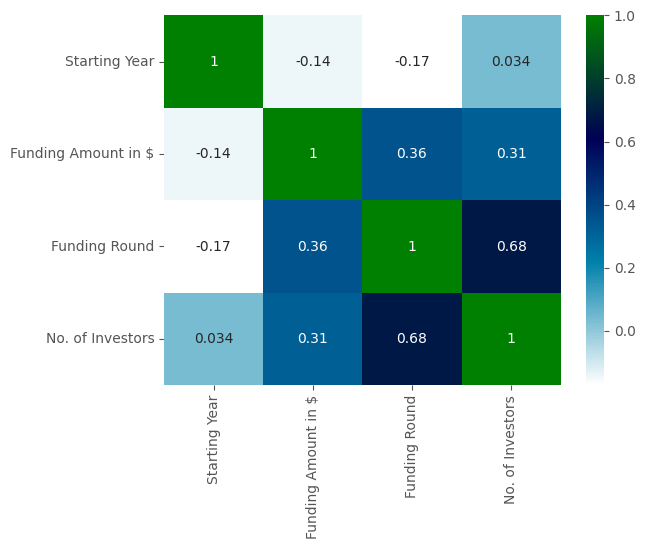

In [11]:
#Correlation matrix
sns.heatmap(data.corr(),annot=True,cmap='ocean_r')

array([[<Axes: title={'center': 'Funding Amount in $'}, xlabel='[No. of Investors]'>,
        <Axes: title={'center': 'Funding Round'}, xlabel='[No. of Investors]'>],
       [<Axes: title={'center': 'Starting Year'}, xlabel='[No. of Investors]'>,
        <Axes: >]], dtype=object)

<Figure size 1600x800 with 0 Axes>

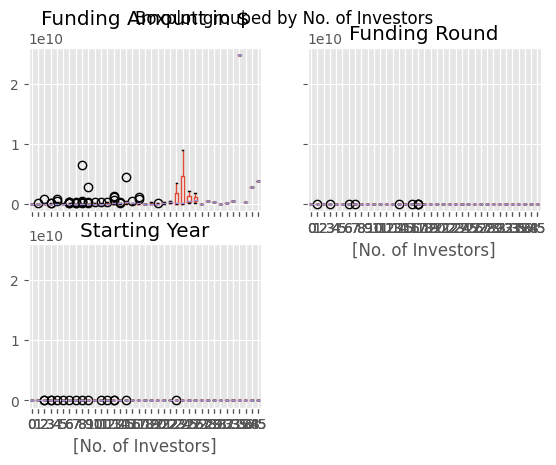

In [12]:

plt.figure(figsize=(16,8))
data.boxplot(by='No. of Investors')

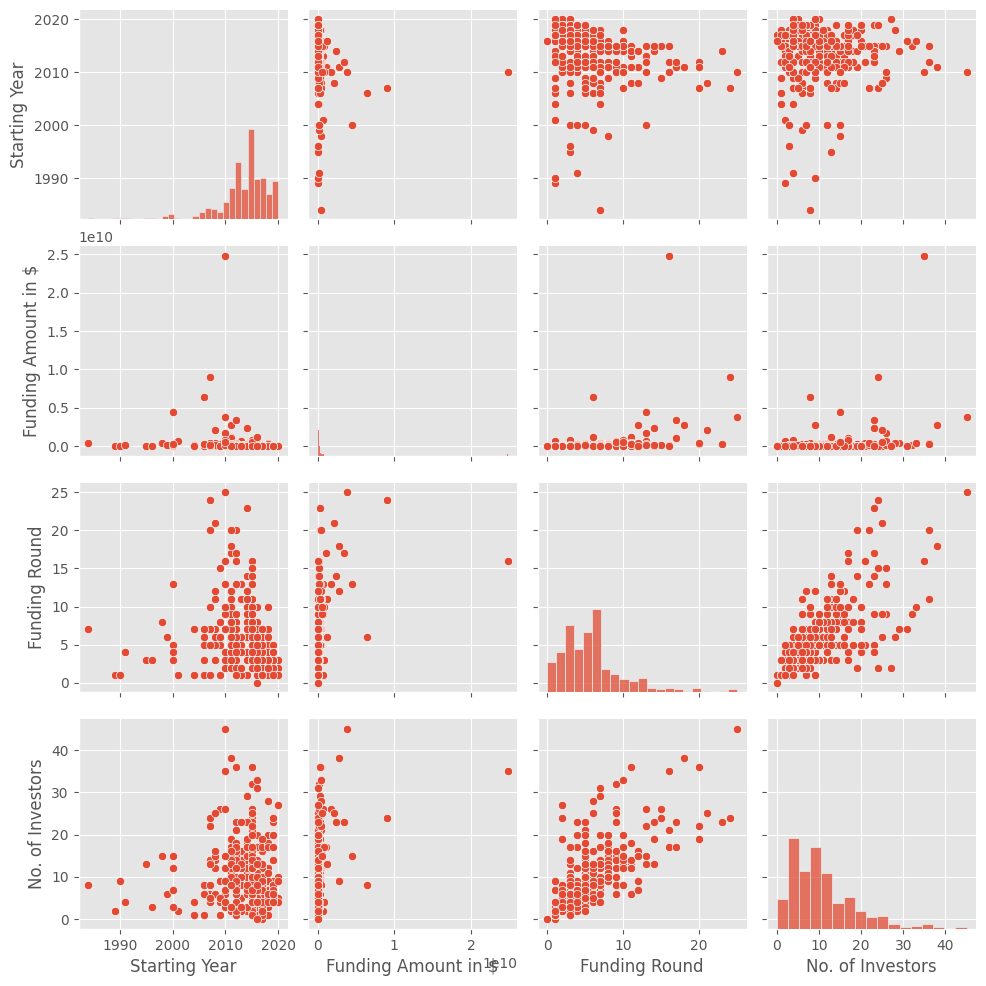

In [13]:
sns.pairplot(data)


Text(0, 0.5, 'Count of the companys')

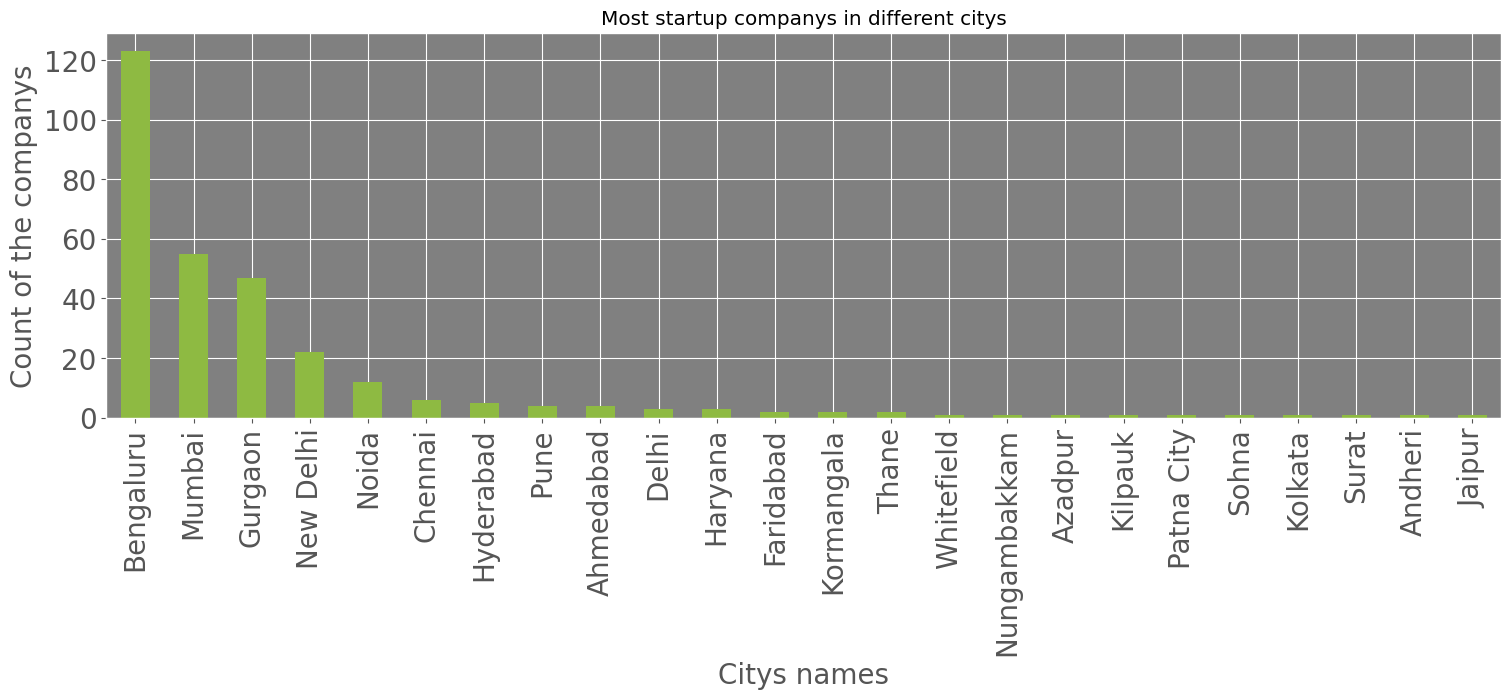

In [14]:
#which city have more startup companys in the data
plt.rcParams['axes.facecolor']='gray'
ax=data['City'].value_counts()\
.sort_values(ascending=False)\
.plot(kind='bar',title='Most startup companys in different citys',figsize=(18,5),color=color[5],fontsize=20)
ax.set_xlabel("Citys names",fontsize=20)
ax.set_ylabel("Count of the companys",fontsize=20)

In [15]:
# write a query for identify the mukesh ambani companys
data.query('Founders == "Mukesh Ambani"')

,Company,City,Starting Year,Founders,Industries,Description,No. of Employees,Funding Amount in $,Funding Round,No. of Investors
32,Reliance Jio,Mumbai,2010,Mukesh Ambani,"Apps, Information Services, Internet, Telecomm...",Reliance Jio is a telecommunications firm that...,10001+,24767620475,16,35
37,Reliance Retail,Mumbai,2006,Mukesh Ambani,"Consumer Goods, Grocery, Retail",Reliance Retail operates a chain of local stor...,10001+,6419310306,6,8


In [17]:
# write a query for identify the parikh companys
data.query('Founders == "Nirmit Parikh"')

,Company,City,Starting Year,Founders,Industries,Description,No. of Employees,Funding Amount in $,Funding Round,No. of Investors
3,Apna,Mumbai,2019,Nirmit Parikh,"Employment, Human Resources, Recruiting, Staff...",Apna is a professional networking and job-sear...,101-250,93450000,4,6


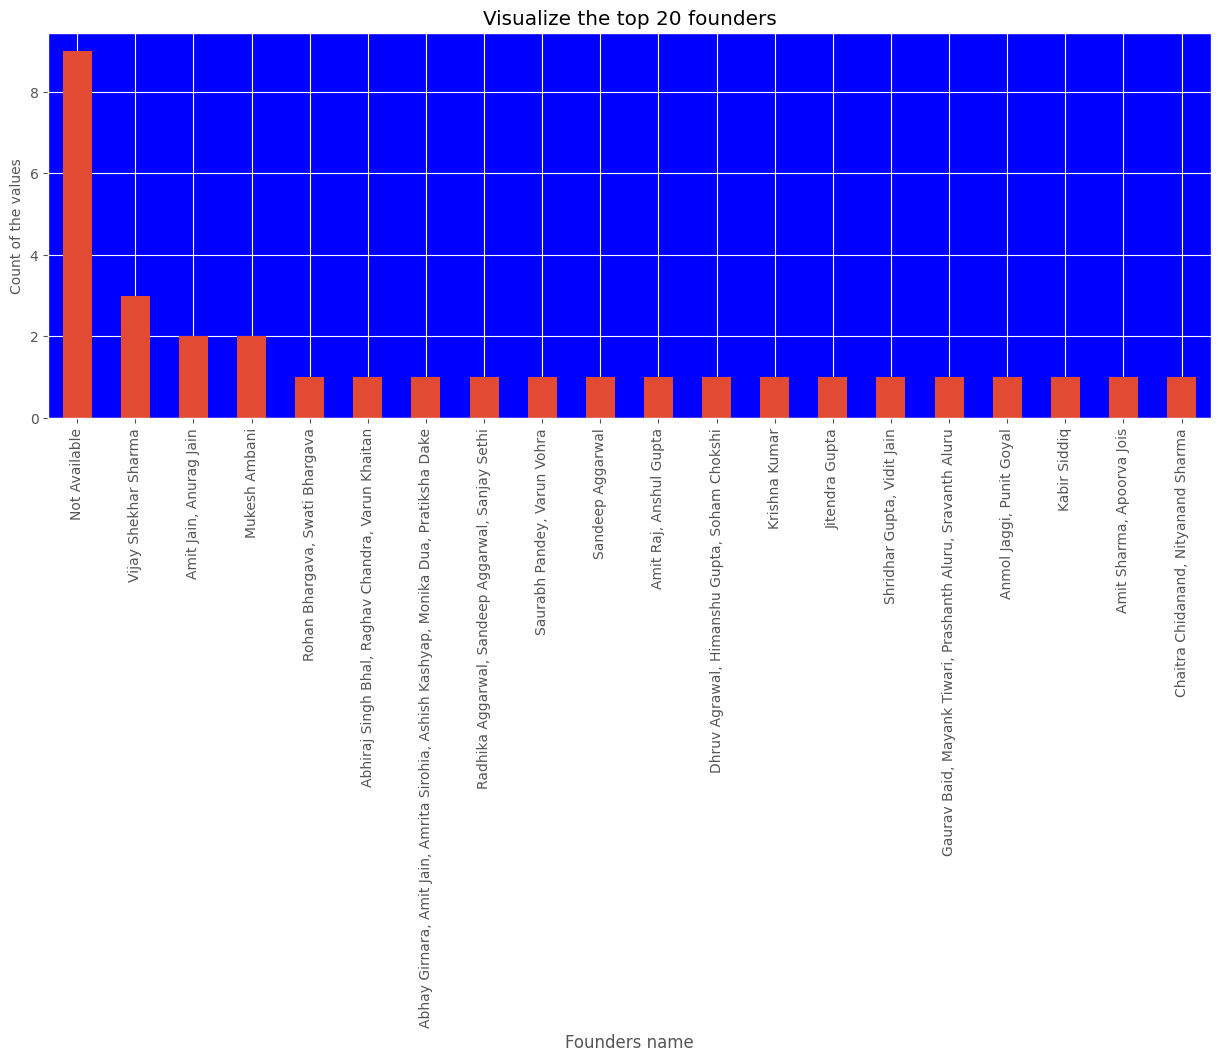

In [18]:
#Visualize the top 20 founders name in data
plt.rcParams['axes.facecolor']='blue'
ax=data['Founders'].value_counts()[:20]\
.sort_values(ascending=False)\
.plot(kind='bar',title='Visualize the top 20 founders',figsize=(15,5))
ax.set_xlabel("Founders name")
ax.set_ylabel("Count of the values",fontsize=10)
plt.show()

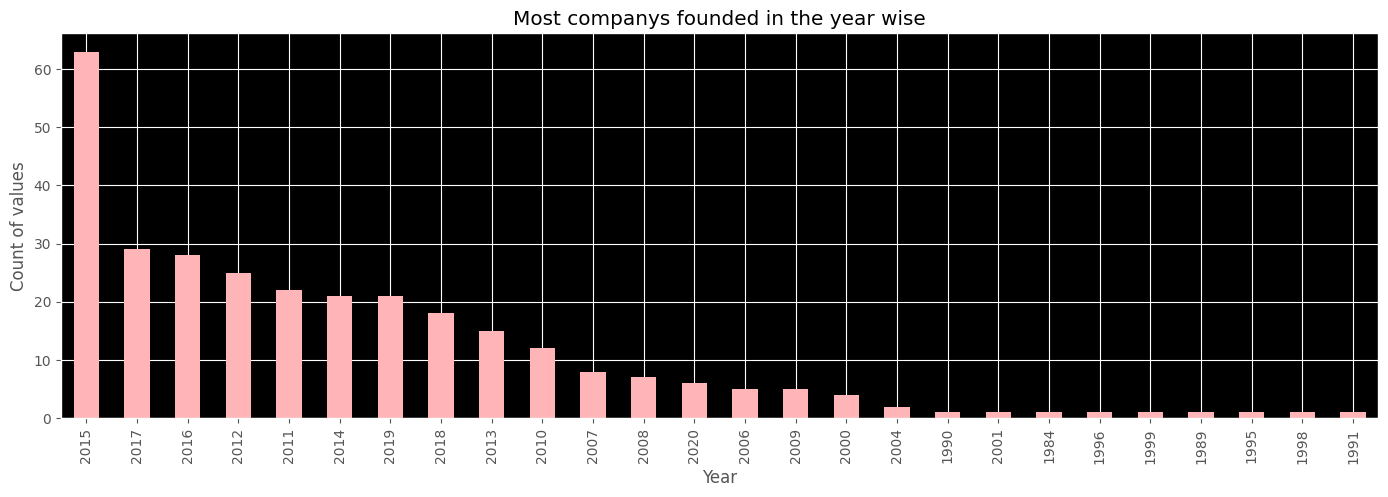

In [19]:
# find the which year most companys started
plt.rcParams['axes.facecolor']='black'
ax=data['Starting Year'].value_counts()\
.plot(kind='bar',title='Most companys founded in the year wise',figsize=(17,5),color=color[6])
ax.set_xlabel("Year")
ax.set_ylabel("Count of values")
plt.show()

In [20]:
data.groupby('Company')['Funding Amount in $'].sum().sort_values()


Company
WOW Skin Science India Ltd                        0
Digital Class E-Learning Marketplace          42000
Convin                                       300000
Polygon (Previously Matic Network)           450000
BimaPe                                       545000
                                           ...     
Ola                                      3808672049
One97                                    4432652051
Reliance Retail                          6419310306
Flipkart                                 9009184737
Reliance Jio                            24767620475
Name: Funding Amount in $, Length: 300, dtype: int64

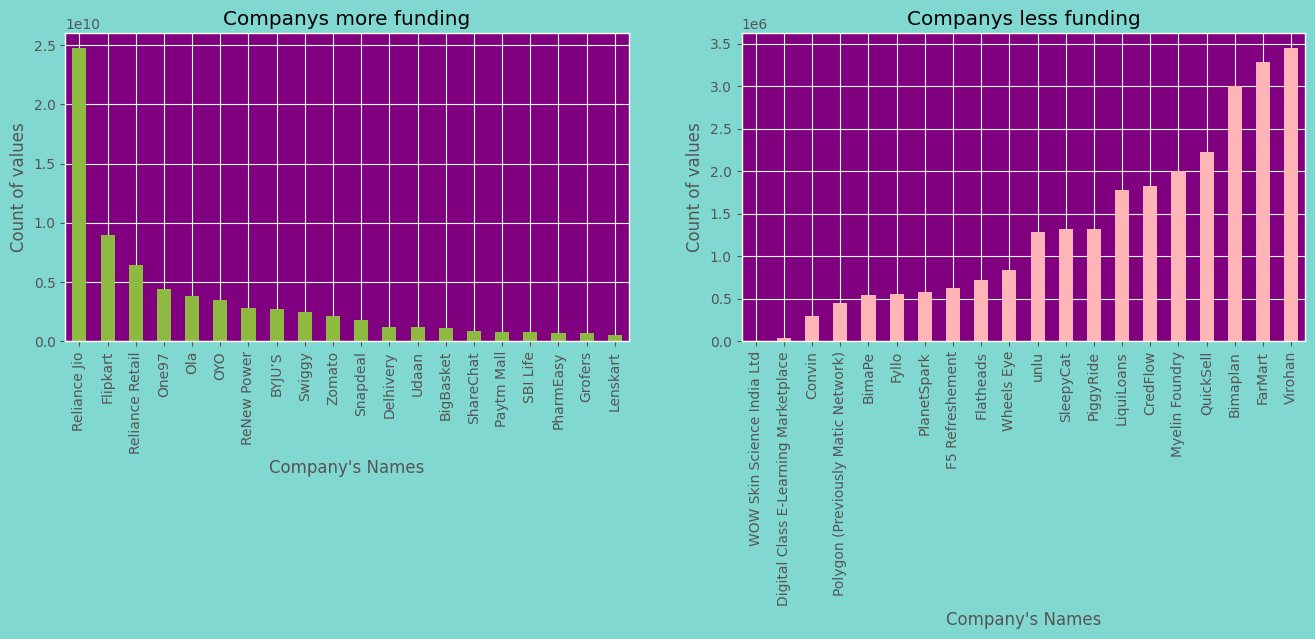

In [21]:
#Find the which company's have more funding in the data
plt.rcParams['axes.facecolor']='#800080'
plt.rcParams['figure.facecolor']='#81D8D0'
plt.subplots(1,2,figsize=(25,6))
plt.subplot(121)
fig=data.groupby('Company')['Funding Amount in $'].sum()\
.sort_values(ascending=False)[:20]\
.plot(kind='bar',title='Companys more funding',figsize=(16,4),color=color[5])
fig.set_xlabel("Company's Names")
fig.set_ylabel("Count of values")
plt.subplot(122)
fig=data.groupby('Company')['Funding Amount in $'].sum()\
.sort_values()[:20]\
.plot(kind='bar',title='Companys less funding',figsize=(16,4),color=color[6])
fig.set_xlabel("Company's Names")
fig.set_ylabel("Count of values")
plt.show()

<Axes: ylabel='No. of Employees'>

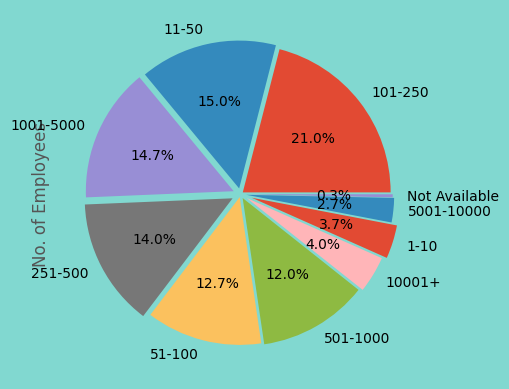

In [22]:
#Let's find the how many compnays medium and large companys in the dataset
data['No. of Employees'].value_counts()\
.plot(kind='pie',labels=data['No. of Employees'].value_counts().index,autopct='%1.1f%%',explode=[0.02,0.04,0.05,0.06,0.02,0.03,0.05,0.08,0.04,0.03])

In [23]:
data.groupby('Company')['No. of Investors'].sum().sort_values()


Company
Digital Class E-Learning Marketplace     0
WOW Skin Science India Ltd               0
RateGain                                 1
Magicbricks                              1
Avataar.Me                               1
                                        ..
Reliance Jio                            35
ZoomCar                                 36
Unacademy                               36
BYJU’S                                  38
Ola                                     45
Name: No. of Investors, Length: 300, dtype: int64

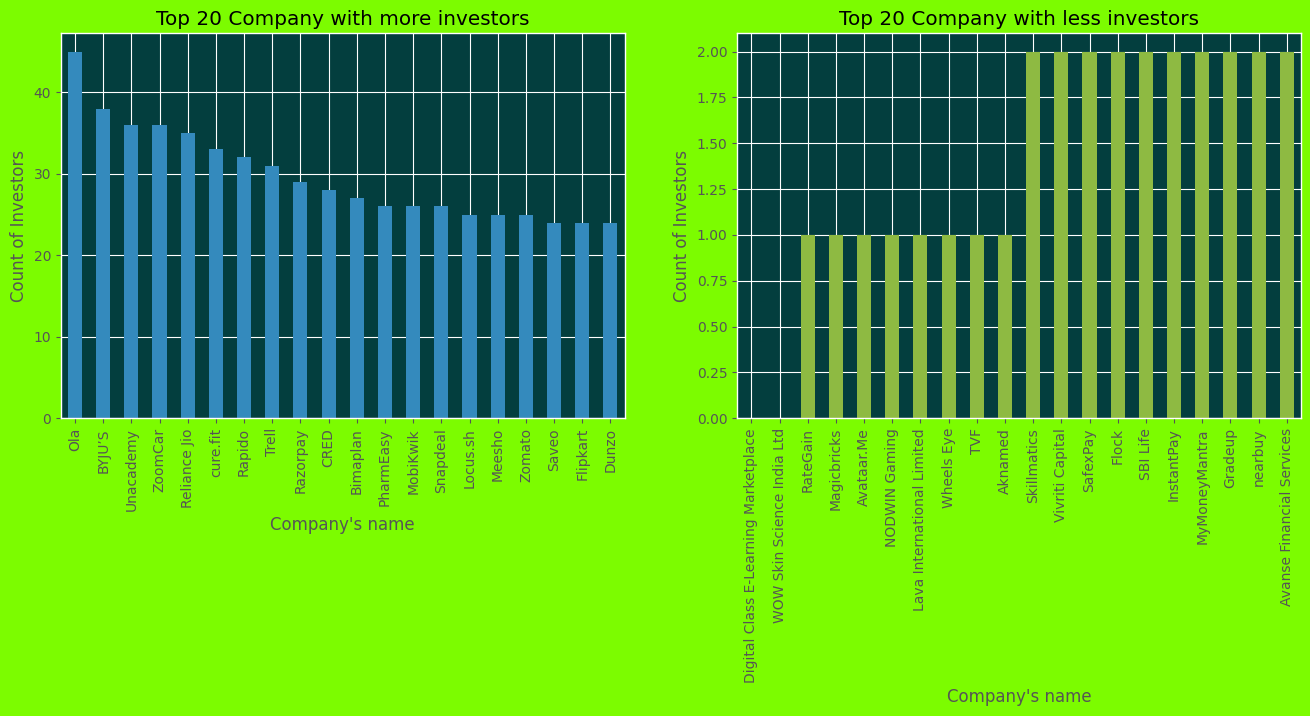

In [24]:
#Find the investor of the each companys
plt.rcParams['axes.facecolor']='#033E3E'
plt.rcParams['figure.facecolor']='#7CFC00'
plt.subplots(1,2,figsize=(17,5))
plt.subplot(121)
fig1=data.groupby('Company')['No. of Investors'].sum()\
.sort_values(ascending=False)[:20]\
.plot(kind='bar',figsize=(16,5),title='Top 20 Company with more investors',color=color[1])
fig1.set_xlabel("Company's name")
fig1.set_ylabel("Count of Investors")
plt.subplot(122)
fig2=data.groupby('Company')['No. of Investors'].sum()\
.sort_values(ascending=True)[:20]\
.plot(kind='bar',figsize=(16,5),title='Top 20 Company with less investors',color=color[5])
fig2.set_xlabel("Company's name")
fig2.set_ylabel("Count of Investors")
plt.show()

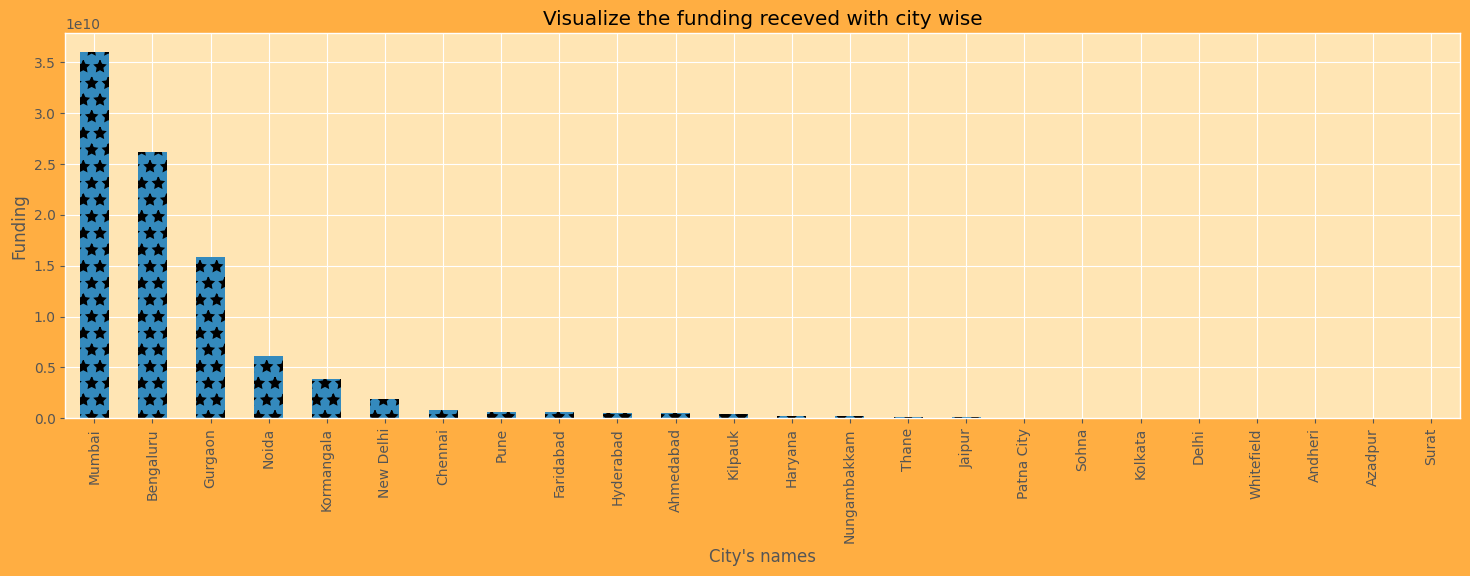

In [25]:
#find the which city recevied more funding
plt.rcParams['axes.facecolor']='#FFE5B4'
plt.rcParams['figure.facecolor']='#FFAE42'
city=data.groupby('City')['Funding Amount in $'].sum()\
.sort_values(ascending=False)\
.plot(kind='bar',title='Visualize the funding receved with city wise',figsize=(18,5),color=color[1],hatch='*')
city.set_xlabel("City's names")
city.set_ylabel("Funding")
plt.show()

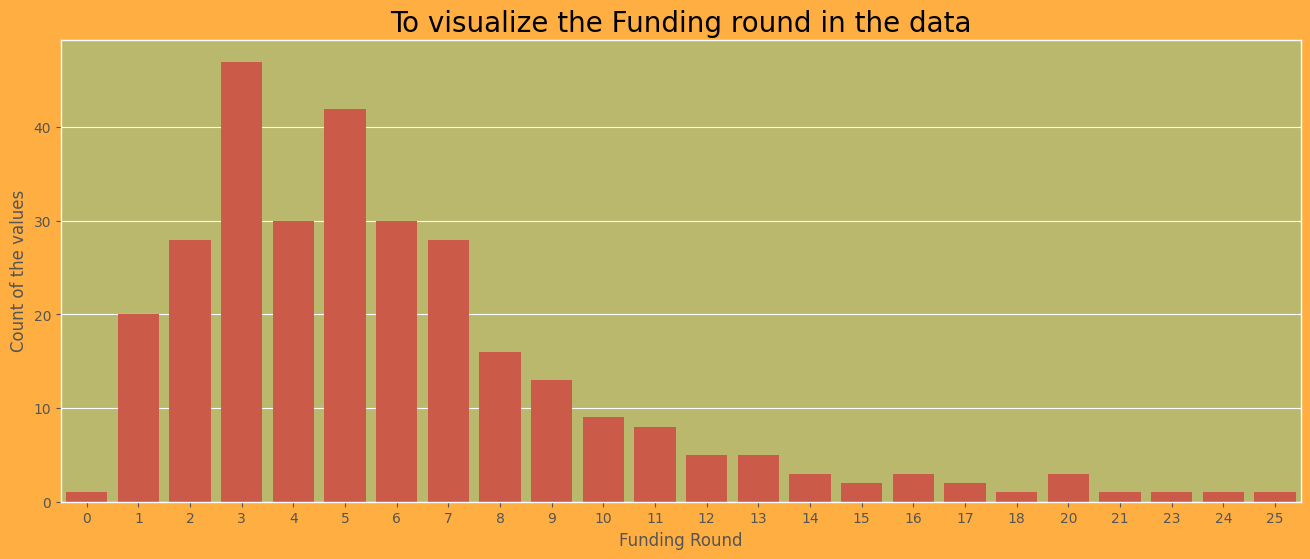

In [26]:
#To visualize the Funding round in the dataset
plt.rcParams['axes.facecolor']='#BAB86C'
plt.rcParams['figure.facecolor']='#FFAE42'
fig,ax=plt.subplots(figsize=(16,6))
sns.countplot(data=data,x='Funding Round',ax=ax)
plt.title("To visualize the Funding round in the data",fontsize=20)
plt.xlabel("Funding Round")
plt.ylabel("Count of the values")
plt.show()

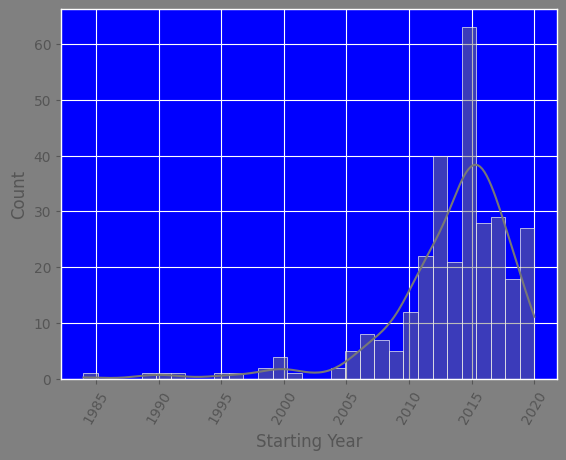

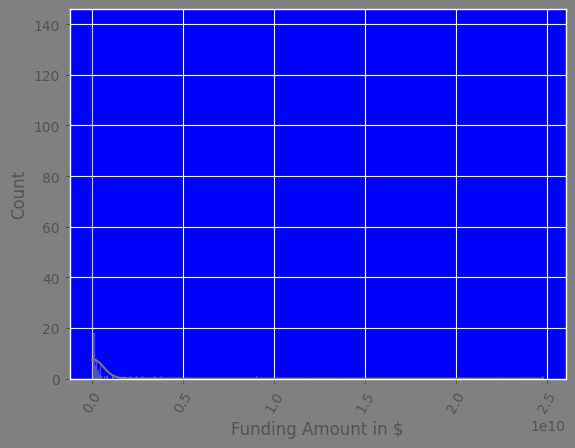

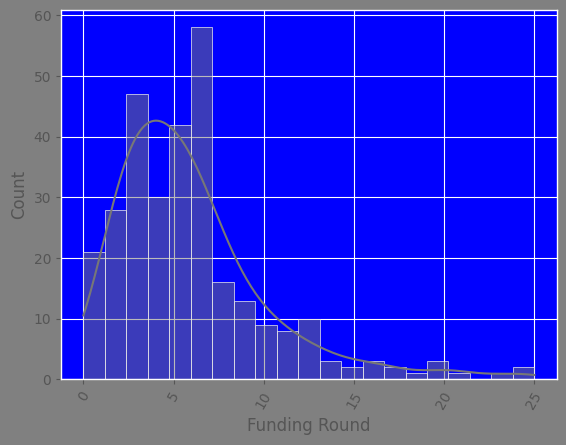

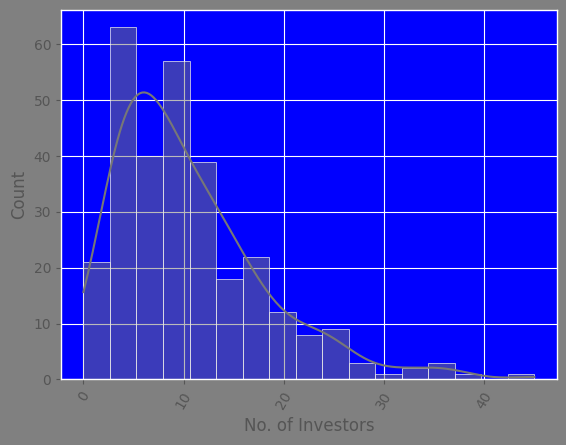

In [32]:
#Select the numerical columns and visualize box plot
plt.rcParams['axes.facecolor']='blue'
plt.rcParams['figure.facecolor']='gray'
for i in data.select_dtypes(include='int'):
    sns.histplot(x=data[i],data=data,color=color[3],kde=True)
    plt.xticks(rotation=60)
    plt.show()

Text(0, 0.5, 'Year')

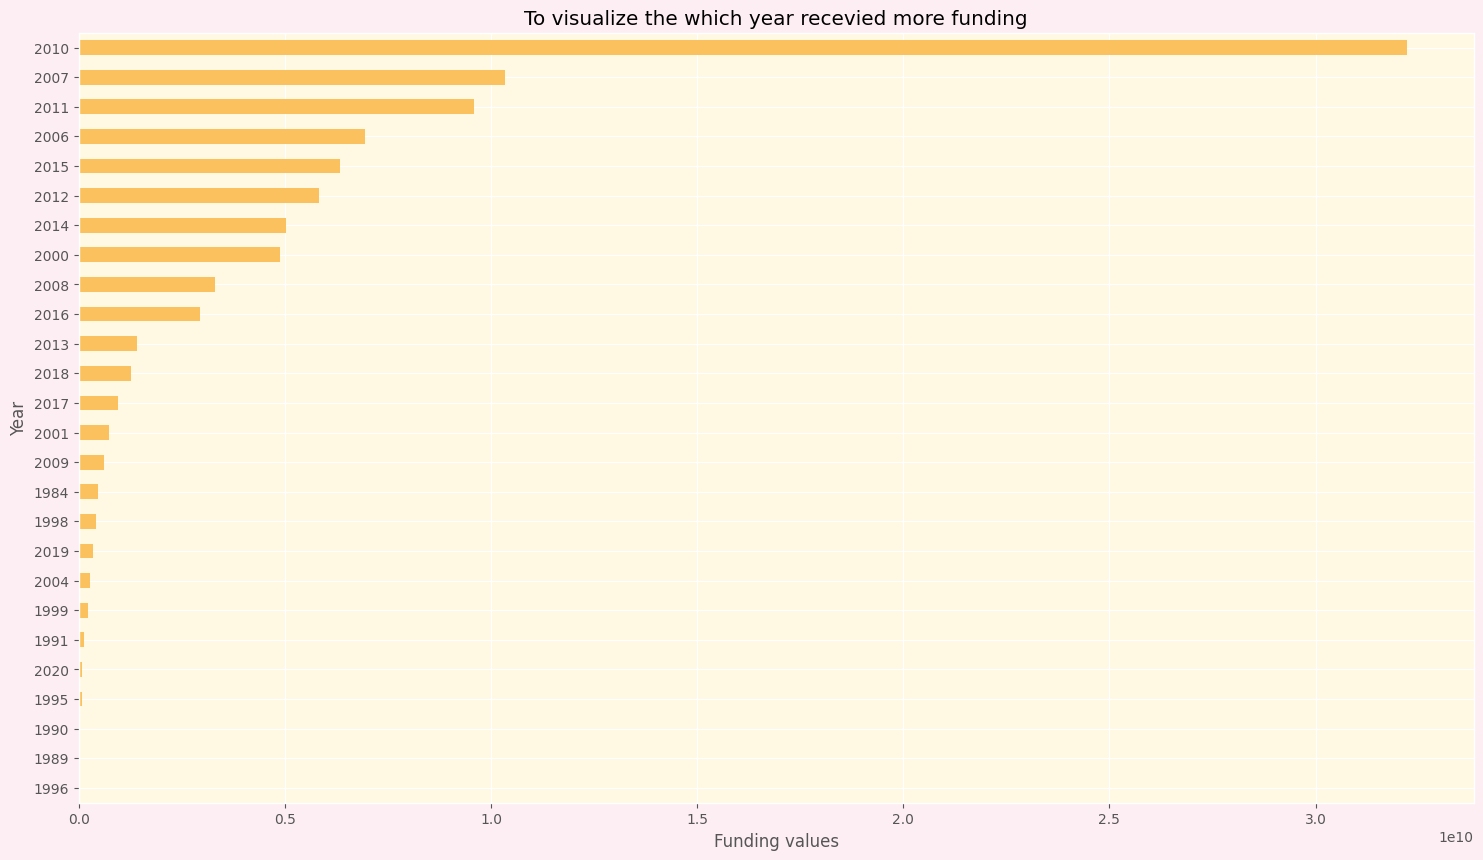

In [33]:
#In which year more funding recevied
plt.rcParams['axes.facecolor']='#FFF9E3'
plt.rcParams['figure.facecolor']='#FDEEF4'
ax=data.groupby('Starting Year')['Funding Amount in $'].sum()\
.sort_values(ascending=True)\
.plot(kind='barh',title='To visualize the which year recevied more funding',figsize=(18,10),color=color[4])
ax.set_xlabel("Funding values")
ax.set_ylabel("Year")

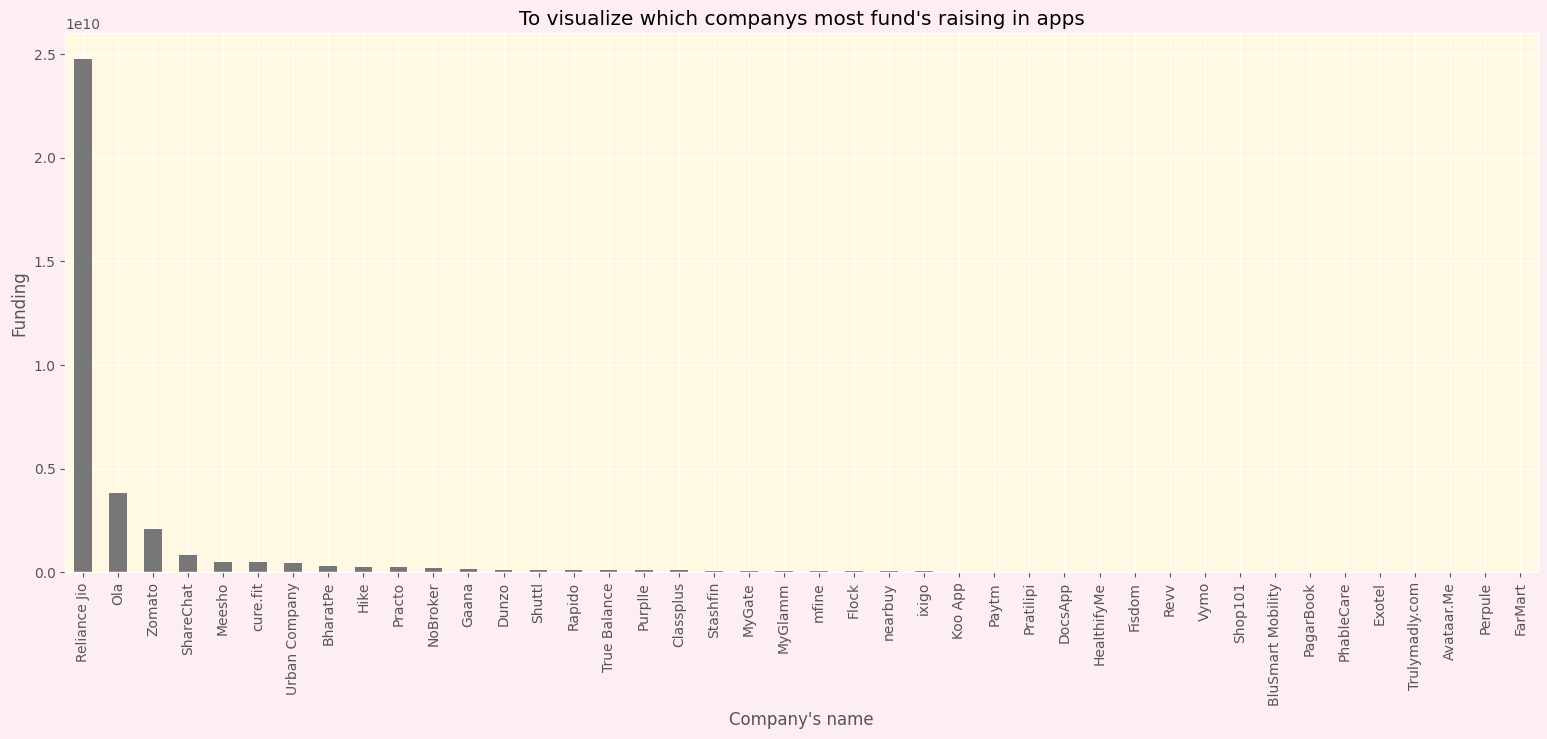

The total funding recevied from the apps deveploment in companys 35447031698


In [34]:
#Whcih company's recevied for apps funding this is not particuler for apps . The founding about all the industries
app=data[data['Industries'].str.contains('Apps')]
ax=app.groupby('Company')['Funding Amount in $'].sum()\
.sort_values(ascending=False)\
.plot(kind='bar',title="To visualize which companys most fund's raising in apps",figsize=(19,7),color=color[3])
ax.set_xlabel("Company's name")
ax.set_ylabel("Funding")
plt.show()
print(f'The total funding recevied from the apps deveploment in companys',app['Funding Amount in $'].sum())

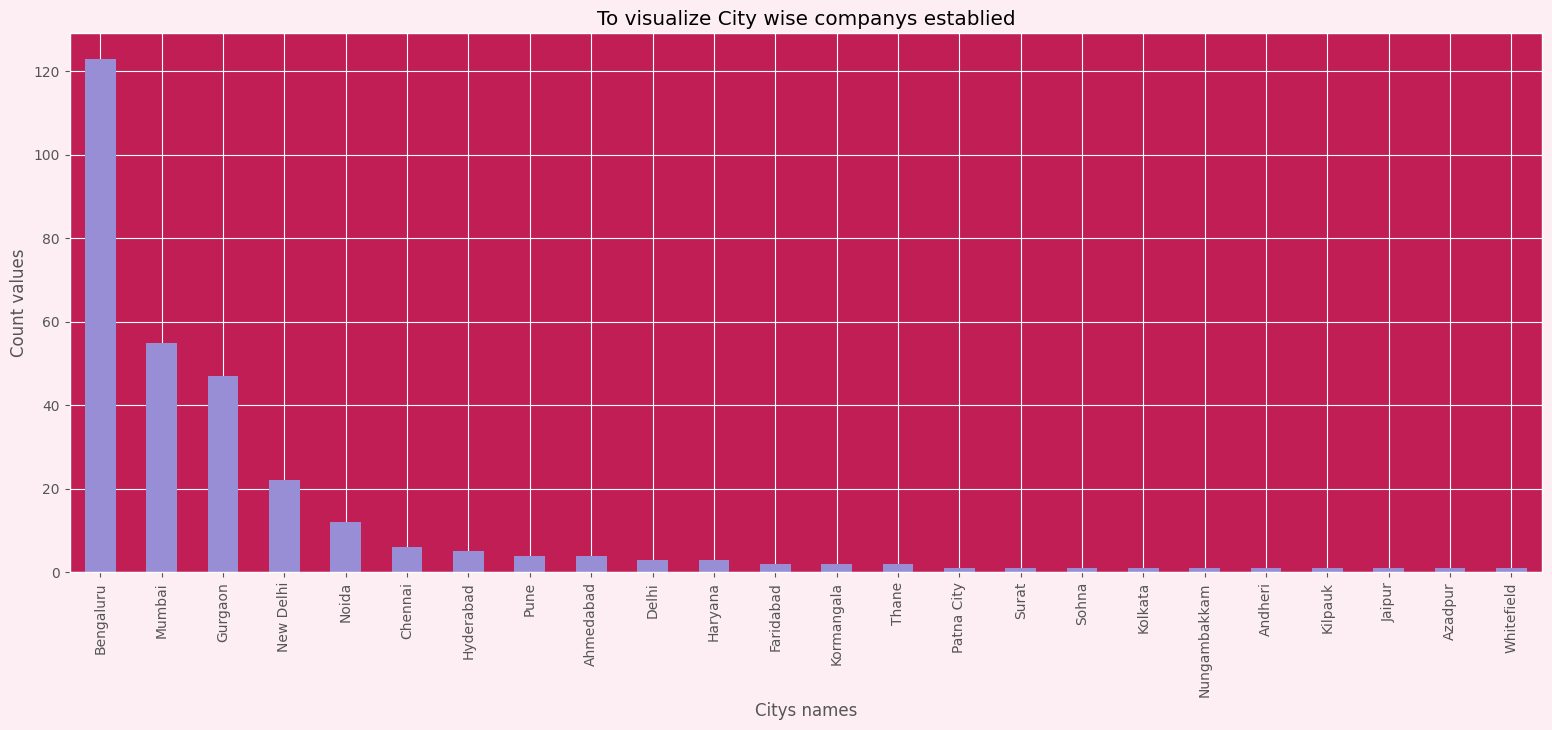

In [35]:
#To visualize the how may companys establish in city wise
plt.rcParams['axes.facecolor']='#C21E56'
plt.rcParams['figure.facecolor']='#FDEEF4'
ax=data.groupby('City')['Company'].count()\
.sort_values(ascending=False)\
.plot(kind='bar',title="To visualize City wise companys establied",figsize=(19,7),color=color[2])
ax.set_xlabel('Citys names')
ax.set_ylabel("Count values")
plt.show()

In [36]:
data.head(1)


,Company,City,Starting Year,Founders,Industries,Description,No. of Employees,Funding Amount in $,Funding Round,No. of Investors
0,Urban Company,Gurgaon,2014,"Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan","Apps, Home Services, Marketplace, Service Indu...",Urban is a marketplace for independent contrac...,1001-5000,445920356,12,16


In [37]:
data['Industries'][0]


'Apps, Home Services, Marketplace, Service Industry'

In [38]:
""" In this code we separtes the all industries into diffent columns.
we use str split menthod once we split the data we concat the data into
main data and fill the None values with no industries.
And create a separe data frame for industre's and visualize in countplot


"""

industries=data['Industries'].str.split(', ', expand=True)
industries.fillna("Unkown")
finall_df=pd.concat([data,industries],axis=1)
finall_df=finall_df.fillna("No industries")

In [39]:
#Create a dataframe for all industries and
app=finall_df[[0,1,2,3,4,5,6,7,8,9]]
app.head()

,0,1,2,3,4,5,6,7,8,9
0,Apps,Home Services,Marketplace,Service Industry,No industries,No industries,No industries,No industries,No industries,No industries
1,B2B,E-Learning,EdTech,Education,Mobile Apps,SaaS,Software,No industries,No industries,No industries
2,E-Commerce,Finance,Financial Services,Internet,Mobile Apps,Mobile Payments,No industries,No industries,No industries,No industries
3,Employment,Human Resources,Recruiting,Staffing Agency,No industries,No industries,No industries,No industries,No industries,No industries
4,Financial Services,FinTech,Payments,Software,No industries,No industries,No industries,No industries,No industries,No industries


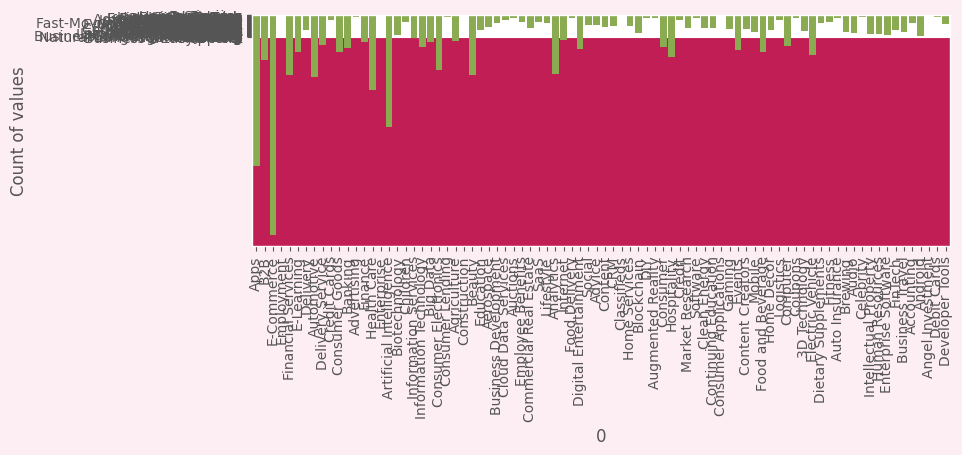

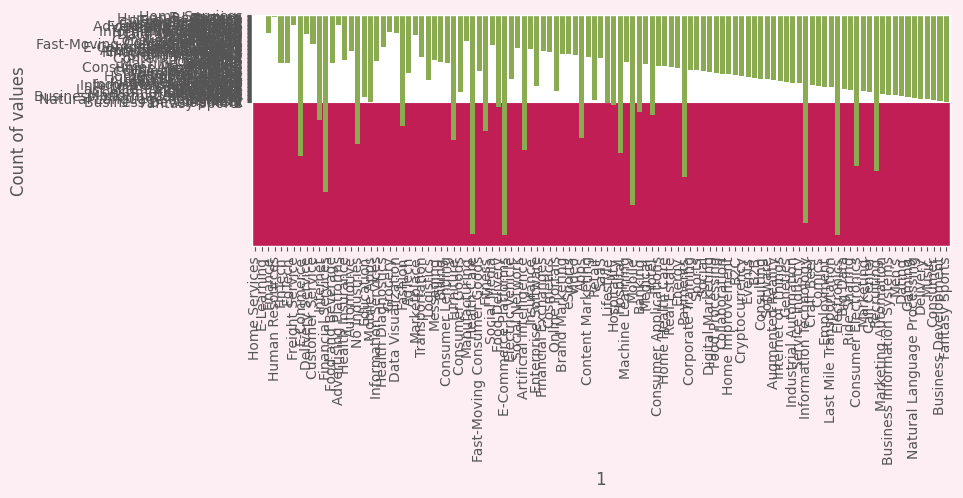

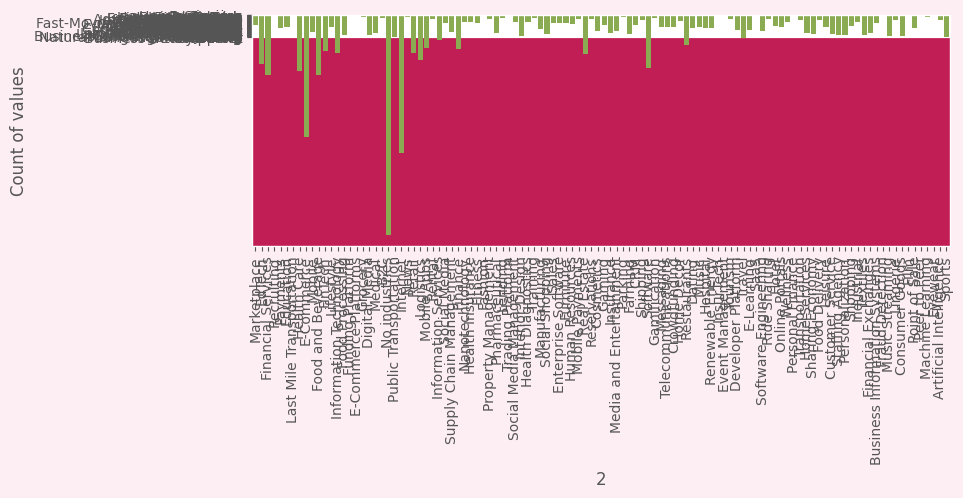

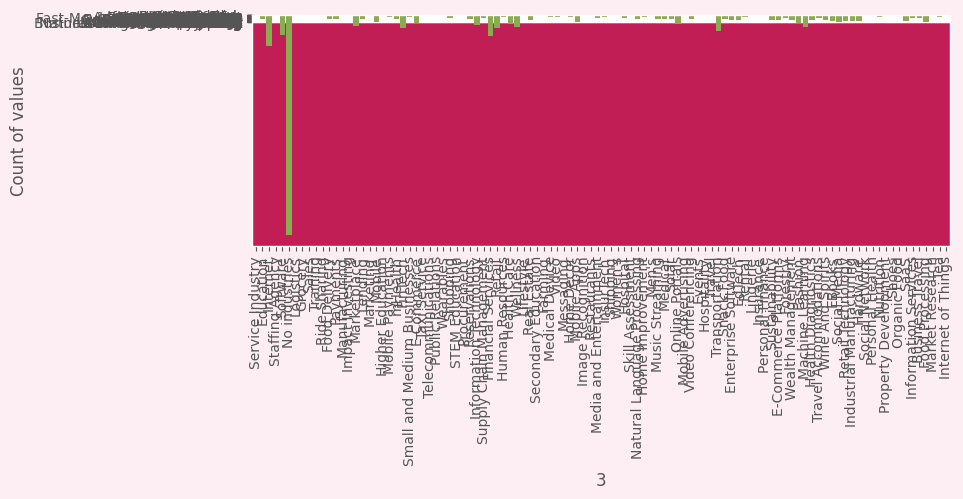

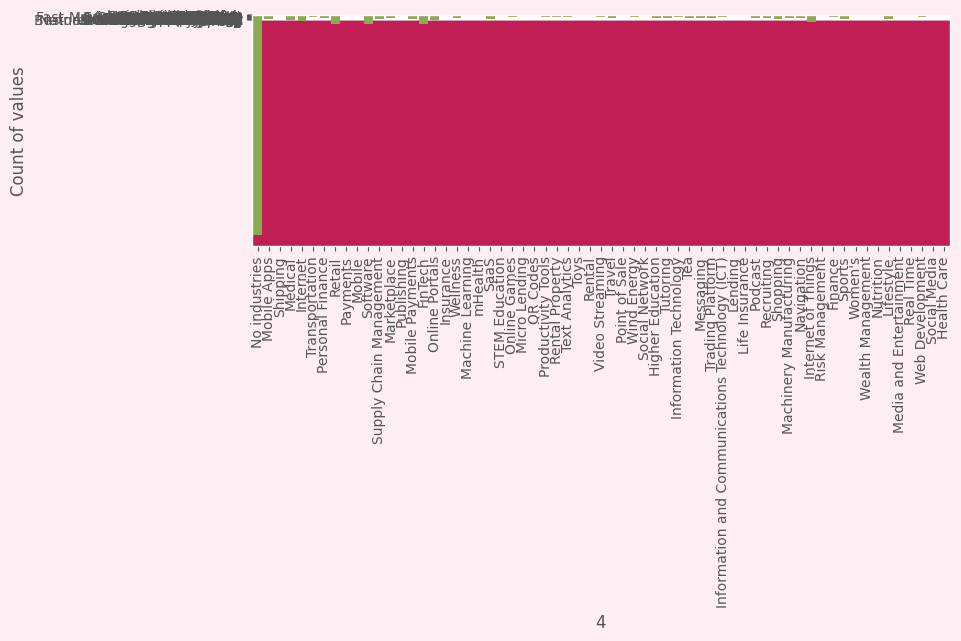

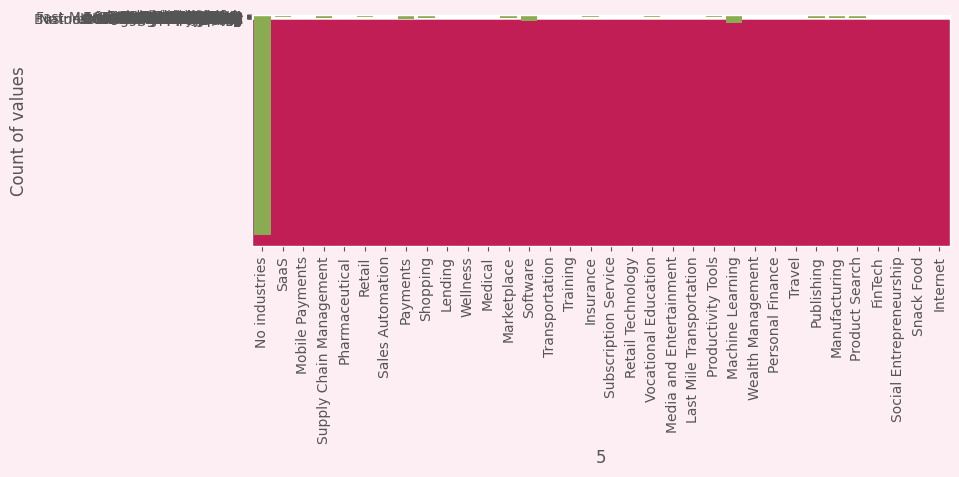

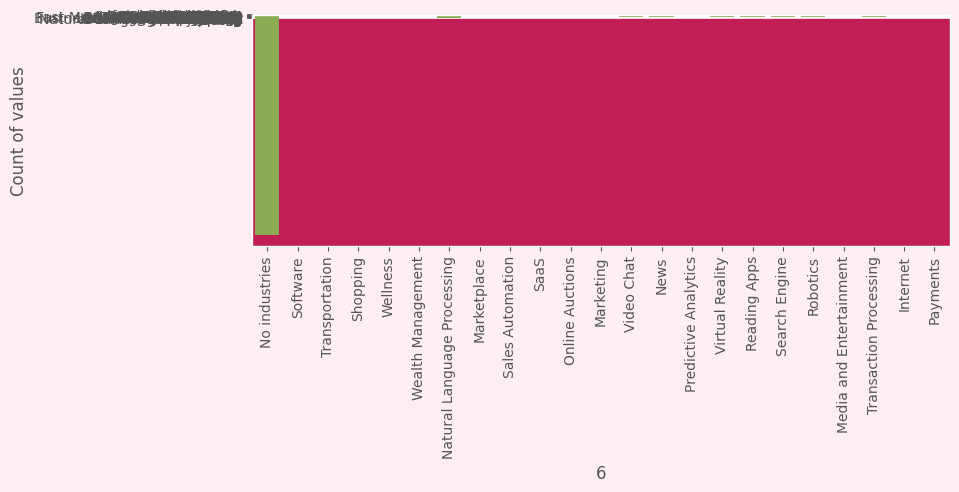

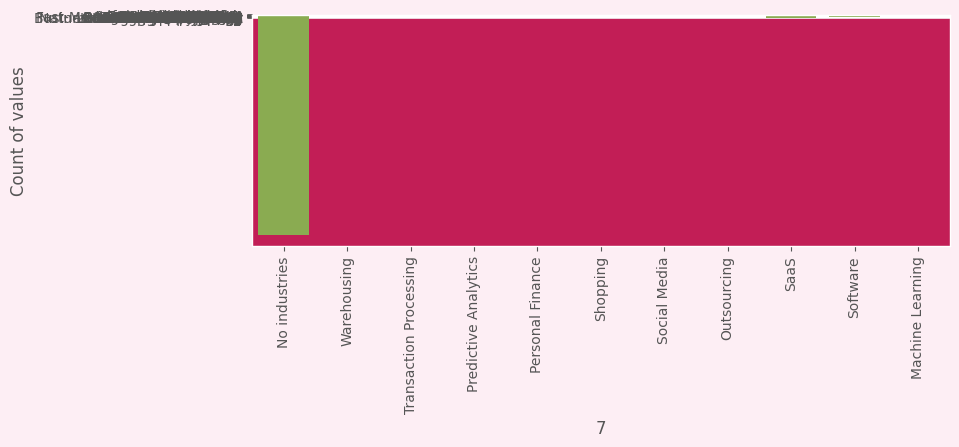

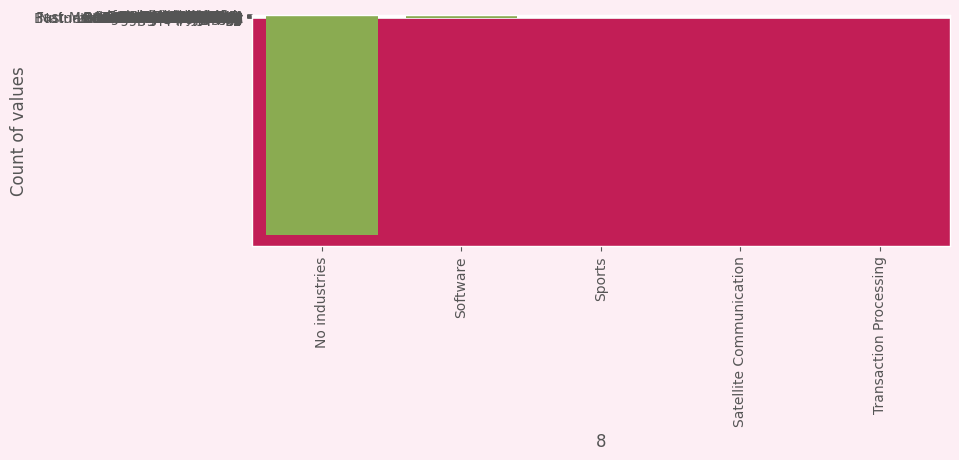

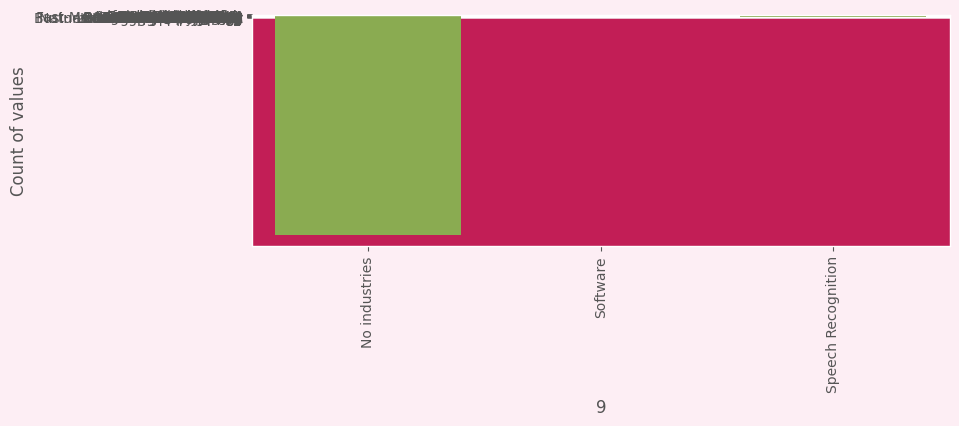

In [43]:
# To visualize the all industries using the countplot
for i in app.columns:
    plt.figure(figsize=(9,3))
    sns.countplot(data=app,x=app[i],color=color[5])
    plt.xticks(rotation=90)
    plt.ylabel("Count of values")
    plt.show()

In [44]:
finall_df.groupby('Company')[[0,1,2,3,4,5,6,7,8,9]].sum()\
.sort_values(by='Company')\
.style.background_gradient(cmap='Reds')

,0,1,2,3,4,5,6,7,8,9
Company,,,,,,,,,,
1mg,Delivery,E-Commerce,Health Care,Internet,Medical,Pharmaceutical,No industries,No industries,No industries,No industries
Agnikul,Aerospace,Manufacturing,Nanotechnology,No industries,No industries,No industries,No industries,No industries,No industries,No industries
Airmeet,Events,Social,Software,Video Conferencing,No industries,No industries,No industries,No industries,No industries,No industries
Aknamed,Health Care,Hospital,Supply Chain Management,No industries,No industries,No industries,No industries,No industries,No industries,No industries
Amber Group,Consumer Electronics,Electronics,Home Services,Industrial Manufacturing,Machinery Manufacturing,Manufacturing,No industries,No industries,No industries,No industries
Apna,Employment,Human Resources,Recruiting,Staffing Agency,No industries,No industries,No industries,No industries,No industries,No industries
Arzooo.com,Consumer Electronics,Electronics,Retail,Retail Technology,Shopping,No industries,No industries,No industries,No industries,No industries
Ather Energy,Automotive,Electric Vehicle,Manufacturing,No industries,No industries,No industries,No industries,No industries,No industries,No industries
Avail Finance,Finance,FinTech,Mobile Payments,No industries,No industries,No industries,No industries,No industries,No industries,No industries


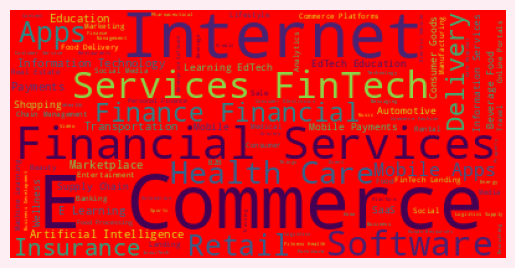

In [45]:
#We import the wordcloud from the
from wordcloud import WordCloud
text3 = ' '.join(finall_df['Industries'])
wordcloud2 = WordCloud(mode='RGB',background_color='red').generate(text3)
# Generate plot
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

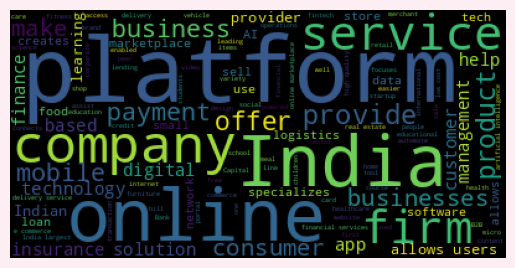

In [46]:
text3 = ' '.join(finall_df['Description'])
wordcloud2 = WordCloud(mode='RGB',background_color='black').generate(text3)
# Generate plot
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

ABOUT THE DATA SET :
Firstly we load the data and using pandas read function, then do some data cleaning process like null values and duplicate values etc.

Then we do some data visualization with data, and visualize the correlation map.

in the EDA part we ask the questions from the data and visualize through the barplots,pie charts, distplot etc.

the next set we extract the industrie columns and we seperate it and fill with none values into no industires and filter with groupby

Finally i use worldcloud generatior two visualize the industries and descrption.